In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset=pd.read_csv(r'C:\Users\test01\Desktop\Social_Network_Ads.csv')
dataset=dataset.drop(columns=['User ID'])
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
lb=LabelEncoder()
x[:,0]=lb.fit_transform(x[:,0])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
from sklearn.svm import SVC

In [4]:
model=SVC(kernel='linear')#because we trying for linear dataset

In [5]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
y_pred=model.predict(x_test)

In [10]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [8]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.925

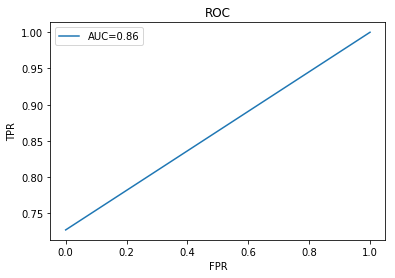

In [12]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,label='AUC=%0.2f' % roc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Prediction-0','Prediction-1'],index=['Actual-0','Actual-1'])

,Prediction-0,Prediction-1
Actual-0,58,0
Actual-1,6,16
